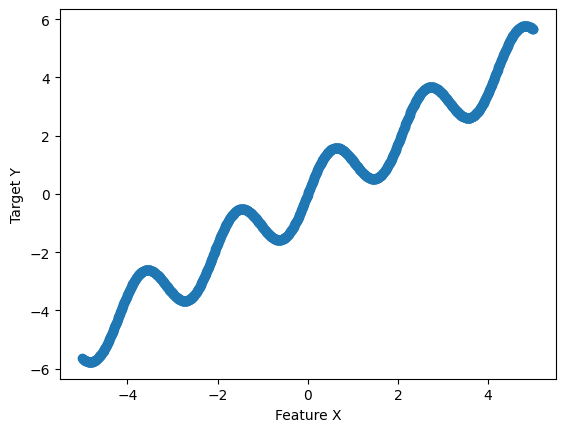

In [1]:
# Library import
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Generate a random dataset with X and Y variables
X = np.linspace(-5 , 5, 1000).reshape(1000, 1)

y_clean = np.sin(3 * X) + X

# Plot the data
plt.scatter(X, y_clean)
plt.xlabel("Feature X")
plt.ylabel("Target Y")
plt.show()

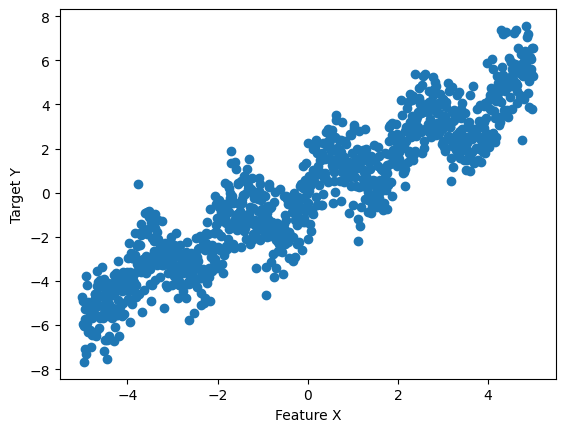

In [2]:
# Add noise to the Y output to create a less "ideal" function
y_noise = np.random.normal(size=len(X)).reshape(y_clean.shape)
y = y_clean + y_noise
plt.scatter(X, y)
plt.xlabel("Feature X")
plt.ylabel("Target Y")
plt.show()

The best estimator is: DecisionTreeRegressor(max_depth=4)
R^2 on the training data is: 0.91
R^2 on the test data is: 0.85


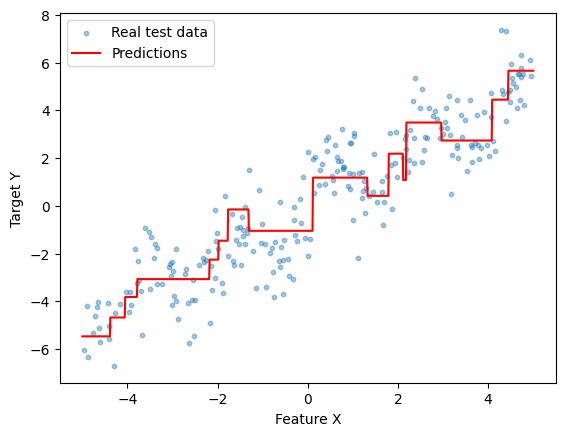

In [3]:
# Split into train and test datasets: train for hyperparameter optimization and test for model performance evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

# Find the optimal tree depth between 3 and 7 using Cross-Validation and GridSearchCV
regr = DecisionTreeRegressor()
params = {"max_depth": range(3, 7)}
regr_opt = GridSearchCV(regr, params, cv=3)
regr_opt.fit(X_train, y_train)

print('The best estimator is: {}'.format(regr_opt.best_estimator_))

y_train_pred = regr_opt.predict(X_train)
y_test_pred = regr_opt.predict(X_test)

print('R^2 on the training data is: {}'.format(np.round(r2_score(y_train, y_train_pred),2)))
print('R^2 on the test data is: {}'.format(np.round(r2_score(y_test, y_test_pred),2)))

# Plot the predictions vs. real test data
X_fit = np.linspace(-5, 5, 1000).reshape(1000, 1)
y_fit = regr_opt.predict(X_fit)
plt.scatter(X_test, y_test, label="Real test data", alpha=0.4, s=10)
plt.plot(X_fit, y_fit, c="red", label="Predictions")
plt.legend()
plt.xlabel("Feature X")
plt.ylabel("Target Y")
plt.show()

R^2 on the training data is: 0.97
R^2 on the test data is: 0.8


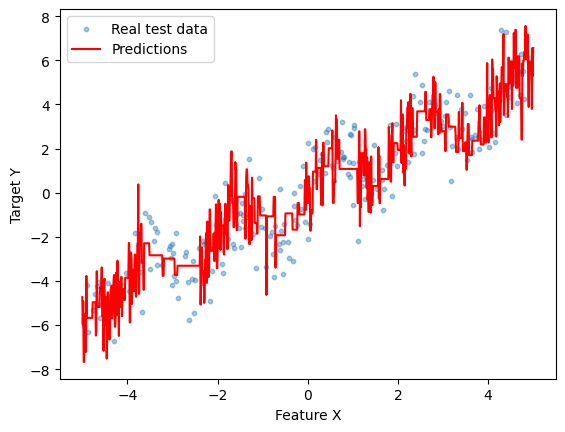

In [4]:
# Use an overfitted model by increasing the tree depth significantly
regr_overfitted = DecisionTreeRegressor(max_depth=10)
regr_overfitted.fit(X_train, y_train)

# Make predictions on train and test data
y_train_pred = regr_overfitted.predict(X_train)
y_test_pred = regr_overfitted.predict(X_test)
y_overfitted = regr_overfitted.predict(X_fit)

# Obtain the metrics for train and test data
print('R^2 on the training data is: {}'.format(np.round(r2_score(y_train, y_train_pred),2)))
print('R^2 on the test data is: {}'.format(np.round(r2_score(y_test, y_test_pred),2)))

# Plot the overfitted predictions and real data
plt.scatter(X_test, y_test, label="Real test data", alpha=0.4, s=10)
plt.plot(X_fit, y_overfitted, c="red", label="Predictions")
plt.legend()
plt.xlabel("Feature X")
plt.ylabel("Target Y")
plt.show()